NVIDIA Stock Prediction

Steps to build stock prediction model


*   Data Preprocessing
*   Building the RNN
*   Making the prediction and visualization


# **Data Preprocessing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NVDA.csv to NVDA (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['NVDA.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-22,19.650000,19.650000,19.17,19.410000,18.851749,8911800
1,2015-07-23,19.450001,19.940001,19.41,19.650000,19.084845,4247900
2,2015-07-24,19.790001,19.809999,19.34,19.420000,18.861464,4721100
3,2015-07-27,19.250000,19.530001,19.09,19.309999,18.754622,4810500
4,2015-07-28,19.360001,19.860001,19.16,19.730000,19.162542,4957700


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-07-15,416.570007,417.320007,402.230011,409.089996,409.089996,10099600
1255,2020-07-16,400.600006,408.269989,395.820007,405.390015,405.390015,8624100
1256,2020-07-17,409.019989,409.940002,403.510010,408.059998,408.059998,6657100
1257,2020-07-20,410.970001,421.250000,406.269989,420.429993,420.429993,7121300
1258,2020-07-21,420.519989,422.399994,411.470001,413.140015,413.140015,6925900


In [ ]:
# Split Training data
data_training = data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-22,19.650000,19.650000,19.170000,19.410000,18.851749,8911800
1,2015-07-23,19.450001,19.940001,19.410000,19.650000,19.084845,4247900
2,2015-07-24,19.790001,19.809999,19.340000,19.420000,18.861464,4721100
3,2015-07-27,19.250000,19.530001,19.090000,19.309999,18.754622,4810500
4,2015-07-28,19.360001,19.860001,19.160000,19.730000,19.162542,4957700
...,...,...,...,...,...,...,...
863,2018-12-24,126.489998,129.979996,124.500000,127.080002,126.452255,11596000
864,2018-12-26,128.940002,133.139999,124.459999,133.100006,132.442535,17377500
865,2018-12-27,130.990005,132.380005,125.180000,131.169998,130.522049,15926100
866,2018-12-28,132.000000,137.389999,130.309998,133.649994,132.989807,15718200


In [ ]:
# Split Testing data
data_test = data[data['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
868,2019-01-02,130.639999,138.479996,130.050003,136.220001,135.547104,12718800
869,2019-01-03,133.789993,135.160004,127.690002,127.989998,127.357750,17638800
870,2019-01-04,130.940002,137.729996,129.699997,136.190002,135.517258,14640500
871,2019-01-07,138.500000,144.889999,136.429993,143.399994,142.691620,17729000
872,2019-01-08,146.690002,146.779999,136.899994,139.830002,139.139282,19650400
...,...,...,...,...,...,...,...
1254,2020-07-15,416.570007,417.320007,402.230011,409.089996,409.089996,10099600
1255,2020-07-16,400.600006,408.269989,395.820007,405.390015,405.390015,8624100
1256,2020-07-17,409.019989,409.940002,403.510010,408.059998,408.059998,6657100
1257,2020-07-20,410.970001,421.250000,406.269989,420.429993,420.429993,7121300


In [ ]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,19.650000,19.650000,19.17,19.410000,8911800
1,19.450001,19.940001,19.41,19.650000,4247900
2,19.790001,19.809999,19.34,19.420000,4721100
3,19.250000,19.530001,19.09,19.309999,4810500
4,19.360001,19.860001,19.16,19.730000,4957700


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.48109745e-03, 4.39186751e-04, 3.00198896e-04, 3.70305518e-04,
        8.35120643e-02],
       [7.40552430e-04, 1.50056724e-03, 1.20079559e-03, 1.25902987e-03,
        3.22671736e-02],
       [1.99948527e-03, 1.02477031e-03, 9.38121551e-04, 4.07335700e-04,
        3.74664879e-02],
       ...,
       [4.13744593e-01, 4.13021997e-01, 3.98101261e-01, 4.14219607e-01,
        1.60582121e-01],
       [4.17484345e-01, 4.31358175e-01, 4.17351508e-01, 4.23403077e-01,
        1.58297807e-01],
       [4.30073651e-01, 4.28869458e-01, 4.24668845e-01, 4.22847646e-01,
        1.13361974e-01]])

In [ ]:
X_train = []
y_train = []

In [ ]:
training_data.shape[0]

868

In [ ]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  y_train.append(training_data[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((808, 60, 5), (808,))

# **Building LSTM**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units= 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units= 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units= 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units= 120, activation = 'relu')) # dont need return_sequence bcuz final output
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))  # Dense output layer


In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
26/26 [==============================] - 4s 148ms/step - loss: 0.0718
Epoch 2/10
26/26 [==============================] - 4s 148ms/step - loss: 0.0166
Epoch 3/10
26/26 [==============================] - 4s 147ms/step - loss: 0.0141
Epoch 4/10
26/26 [==============================] - 4s 148ms/step - loss: 0.0104
Epoch 5/10
26/26 [==============================] - 4s 147ms/step - loss: 0.0106
Epoch 6/10
26/26 [==============================] - 4s 147ms/step - loss: 0.0092
Epoch 7/10
26/26 [==============================] - 4s 148ms/step - loss: 0.0098
Epoch 8/10
26/26 [==============================] - 4s 147ms/step - loss: 0.0078
Epoch 9/10
26/26 [==============================] - 4s 147ms/step - loss: 0.0085
Epoch 10/10
26/26 [==============================] - 4s 149ms/step - loss: 0.0075


In [ ]:
## Now we will test and predict stock price

## Prepare test dataset
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
868,2019-01-02,130.639999,138.479996,130.050003,136.220001,135.547104,12718800
869,2019-01-03,133.789993,135.160004,127.690002,127.989998,127.357750,17638800
870,2019-01-04,130.940002,137.729996,129.699997,136.190002,135.517258,14640500
871,2019-01-07,138.500000,144.889999,136.429993,143.399994,142.691620,17729000
872,2019-01-08,146.690002,146.779999,136.899994,139.830002,139.139282,19650400


In [ ]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
808,2018-10-04,285.269989,286.250000,276.179993,279.290009,277.632599,9780500
809,2018-10-05,278.290009,280.799988,267.540009,269.859985,268.258514,10665900
810,2018-10-08,266.500000,271.160004,260.079987,265.769989,264.192780,10215300
811,2018-10-09,264.940002,268.760010,262.799988,265.540009,263.964203,6837500
812,2018-10-10,261.260010,263.109985,245.600006,245.690002,244.231964,17123500
813,2018-10-11,242.169998,247.559998,234.259995,235.130005,233.734634,18135900
814,2018-10-12,245.509995,249.539993,239.649994,246.539993,245.076920,15205900
815,2018-10-15,246.000000,246.000000,235.339996,235.380005,233.983154,11244000
816,2018-10-16,239.929993,246.279999,237.940002,245.830002,244.371155,10217800
817,2018-10-17,248.339996,249.880005,241.080002,243.059998,241.617569,8241700


In [ ]:
past_60_days = data_training.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,285.269989,286.250000,276.179993,279.290009,9780500
1,278.290009,280.799988,267.540009,269.859985,10665900
2,266.500000,271.160004,260.079987,265.769989,10215300
3,264.940002,268.760010,262.799988,265.540009,6837500
4,261.260010,263.109985,245.600006,245.690002,17123500


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.98500382, 0.97617388, 0.96472665, 0.9627107 , 0.09305696],
       [0.95915875, 0.95622728, 0.93230523, 0.92779115, 0.10278535],
       [0.91550336, 0.9209457 , 0.9043116 , 0.91264582, 0.09783435],
       ...,
       [1.44321835, 1.42886941, 1.44253078, 1.4395483 , 0.05873841],
       [1.45043874, 1.4702631 , 1.45288757, 1.48535462, 0.06383883],
       [1.4857999 , 1.47447198, 1.47240054, 1.4583597 , 0.06169186]])

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i, 0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((391, 60, 5), (391,))

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
scaler.scale_

array([3.70274364e-03, 3.65992009e-03, 3.75248621e-03, 3.70301815e-03,
       1.09875621e-08])

In [ ]:
scale = 1/3.70274364e-03
scale

270.0700067909643

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

In [ ]:
y_pred

array([[132.64104 ],
       [131.35544 ],
       [130.08476 ],
       [128.86865 ],
       [127.759514],
       [126.80187 ],
       [126.03416 ],
       [125.489204],
       [125.18089 ],
       [125.11618 ],
       [125.302536],
       [125.741066],
       [126.41832 ],
       [127.31762 ],
       [128.39551 ],
       [129.59827 ],
       [130.8813  ],
       [132.18866 ],
       [133.34586 ],
       [134.19348 ],
       [134.64136 ],
       [134.68204 ],
       [134.38077 ],
       [133.84715 ],
       [133.20903 ],
       [132.58517 ],
       [132.05807 ],
       [131.68004 ],
       [131.47733 ],
       [131.46115 ],
       [131.63774 ],
       [131.9923  ],
       [132.47974 ],
       [133.07889 ],
       [133.78743 ],
       [134.60217 ],
       [135.52362 ],
       [136.54262 ],
       [137.63733 ],
       [138.7726  ],
       [139.91544 ],
       [141.04118 ],
       [142.1306  ],
       [143.1677  ],
       [144.13106 ],
       [144.98563 ],
       [145.69617 ],
       [146.2

# **Visualization**

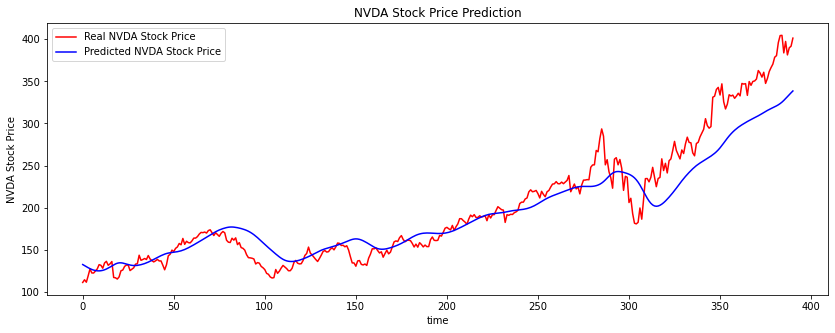

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = "Real NVDA Stock Price")
plt.plot(y_pred, color = 'blue', label = 'Predicted NVDA Stock Price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('NVDA Stock Price')
plt.legend()
plt.show()
